In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


#### Zbiór Fashion MNIST jest dostępny bezpośrednio jako dataset w bibliotece Tensorflow 

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

#### Podzielmy dostępne dane na zbiór treningowy i testowy

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Przyjrzyjmy się jak wyglądają dane treningowe

In [ ]:
training_images[0]

(60000, 28, 28)

In [ ]:
training_images[1][0]

array([  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,  54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [ ]:
import numpy as np
np.set_printoptions(linewidth=100)
import matplotlib.pyplot as plt
# plt.imshow(training_images[1])
print(training_images[0])
# print(training_images[1])
# print(training_labels[0])

[[0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.  

Normalizujemy dane

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
layers = [tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]

In [ ]:
layers[0]

In [ ]:
model = tf.keras.models.Sequential(layers)

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
test_data = (test_images, test_labels)
history = model.fit(training_images, training_labels, epochs=20, validation_data=test_data)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2800 - accuracy: 0.8959 - val_loss: 0.3591 - val_accuracy: 0.8734
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2680 - accuracy: 0.9006 - val_loss: 0.3300 - val_accuracy: 0.8823
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2566 - accuracy: 0.9038 - val_loss: 0.3322 - val_accuracy: 0.8845
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2465 - accuracy: 0.9074 - val_loss: 0.3400 - val_accuracy: 0.8815
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2379 - accuracy: 0.9110 - val_loss: 0.3288 - val_accuracy: 0.8863
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2331 - accuracy: 0.9126 - val_loss: 0.3298 - val_accuracy: 0.8850
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2234 - accuracy: 0.9162 - val_loss: 0.3561 - val_accuracy:

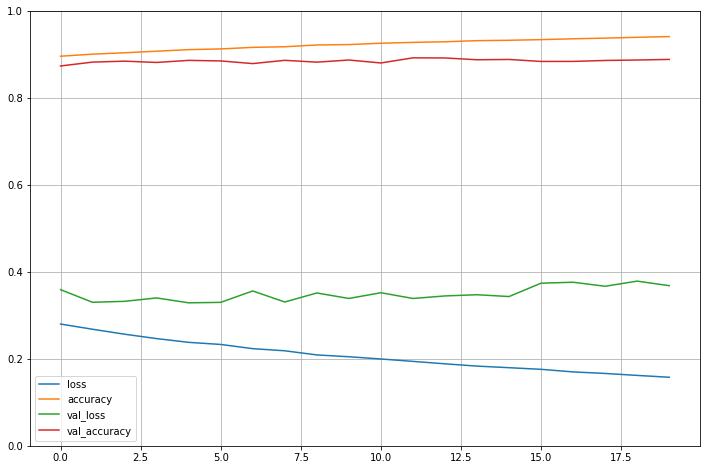

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)

plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Sequential: Określa kolejność warstw w sieci neuronowej.

Flatten: Nasze obrazy to kwadraty o rozmiarze 28 na 28 pikseli. Flatten po prostu bierze ten kwadrat i zamienia go w jednowymiarowy tenosor, inaczej wektor o rozmiarze 784x1.

Dense: Dodaje kolejną wartwę gęstą (fully connectec layers) do naszej sieci.

Każda warstwa neuronów potrzebuje funkcji aktywacji, aby powiedzieć im, co robić. A tak bardziej technicznie; funkcja aktywacji wprowadza element nieliniowy do sieci i pozwala jej uczyć się ogólnych funkcji, które są nieliniowe. Jest wiele opcji, ale na razie skorzystamy z Relu.

Relu w praktyce oznacza:
if x>0:
  return x
else:
  return 0
Więc to co robi, przekazuje tylko wartości 0 lub większe do następnej warstwy w sieci.

Softmax przyjmuje zbiór wartości i efektywnie wybiera największą z nich, więc np. jeśli wynik ostatniej warstwy wygląda następująco [0,1, 0,1, 0,05, 0,1, 9,5, 0,1, 0,05, 0,05, 0,05], oszczędza łowienia przez tą warstwę największej wartości, zamieniając wynik uprzedni wynik w [0,0,0,0,1,0,0,0,0] -- Celem jest zaoszczędzenie dużo kodowania!

Następną rzeczą do zrobienia, gdy model jest już zdefiniowany, jest faktyczne zbudowanie go. Robisz to, kompilując go z optymalizatorem i funkcją straty, jak poprzednio, a następnie trenujesz, wywołując *model.fit * z prośbą o dopasowanie danych treningowych do etykiet treningowych – tj. model ma ustalić  związek między danymi treningowymi i ich rzeczywistymi etykietami, więc w przyszłości, jeśli masz dane, które wyglądają jak dane treningowe, możesz przewidzieć, do jakich kategorie powinny przynależeć.

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3682 - accuracy: 0.8885


[0.3682035207748413, 0.8884999752044678]

## Ćwiczenie 1
Wykonajmy klasyfikacje dla wszytkich przykładów ze zbioru testowego


In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
classifications = model.predict(test_images)

print(classifications[1])

313/313 [==============================] - 1s 2ms/step
[1.9211789e-03 5.1858615e-22 9.9728072e-01 9.4527949e-14 7.9179509e-04 1.5923329e-13 6.3480156e-06
 3.5224616e-22 2.9790367e-21 3.8923894e-18]


In [ ]:
np.argmax(classifications[1])

2

In [ ]:
test_labels[1]

2

Wyjściem modelu jest lista 10 liczb. Liczby te są prawdopodobieństwem, że klasyfikowany obrazek ma etykietę odpowiadającej indeksowi w liście (https://github.com/zalandoresearch/fashion-mnist#labels), tzn. pierwsza wartość na liście jest prawdopodobieństwem, że obrazek ma wartość "0" (T-shirt/top), następna to "1" (Spodnie) itd. Zauważ, że wszystkie są BARDZO NISKIMI prawdopodobieństwami.

Dla 2 (Pullover), prawdopodobieństwo było około 98% , czyli sieć neuronowa mówi nam, że jest to prawie na pewno 2. Na liście test_labels możemy sprawdzić, że faktycznie powinna to być klasy o numerze 2 - Pullover.


##Ćwiczenie 2: 
Przyjrzyjmy się teraz warstwom w twoim modelu. Eksperymentuj z różnymi wartościami dla warstwy Dense z 512 neuronami. Jakie różne wyniki uzyskasz dla rezultatu funkcji kosztu (loss), czasu treningu itp. Jak myślisz, dlaczego tak się dzieje?

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.9.2
11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1835
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0738
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0503
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0326
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[3.3193676e-10 6.6676047e-11 9.6858177e-10 1.7743413e-07 4.1231629e-14 8.2437902e-12 8.0989794e-14 9.9999982e-01 4.3254889e-11 1.9878634e-09]
7


In [ ]:
import numpy as np
np.argmax([1.0310705e-08, 4.2835819e-09, 1.6840152e-08, 1.7102764e-05, 6.0180065e-15, 1.5159587e-08, 1.5089915e-12, 9.9998295e-01, 4.0815871e-09, 2.6436641e-08])

7

##Ćwiczenie 3: 

Co by się stało, gdyby usunąć warstwę Flatten(). Jak myślisz, skąd ten wynik?

Otrzymujesz błąd dotyczący kształtu danych. Może się to teraz wydawać niejasne, ale wynika to z ogólnej zasady, że pierwsza warstwa w twojej sieci powinna mieć taki sam kształt jak twoje dane. W tej chwili nasze dane to obrazy 28x28, a 28 warstw po 28 neuronów byłoby niewykonalne, więc bardziej sensowne jest "spłaszczenie" tych obrazków o rozmiarze 28x28 do 784x1. Zamiast pisać cały kod, aby poradzić sobie z tym samemu, dodajemy warstwę Flatten() na początku, a kiedy tablice są ładowane do modelu później, zostaną automatycznie spłaszczone dla nas.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.9.2
Epoch 1/5


ValueError: ignored

##Ćwiczenie 4: 

Zastanów się nad warstwą ostatnią (wyjściowymi). Dlaczego ma 10 neuronów? Co by się stało, gdybyś miał inną ilość niż 10? Na przykład, spróbuj wytrenować sieć z 5 neuronami w ostatniej warstwie?

Otrzymasz błąd, gdy tylko znajdzie ona nieoczekiwaną wartość. Zasada brzmi tak -- liczba neuronów w ostatniej warstwie powinna odpowiadać liczbie klas, dla których dokonujesz klasyfikacji. W tym przypadku są to cyfry 0-9, więc jest ich 10, stąd powinieneś mieć 10 neuronów w ostatniej warstwie.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

test_data = (test_images, test_labels)
model.fit(training_images, training_labels, epochs=5, validation_data=test_data)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.9.2
Epoch 1/5


InvalidArgumentError: ignored

## Ćwiczenie 5 

### Dodaj kilka warst i poksperymentuj z liczbą neuronów.